In [63]:
from sklearn.datasets import make_classification
import numpy as np 

X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=32,hypercube=False,class_sep=10)


In [64]:
import matplotlib.pyplot as plt 

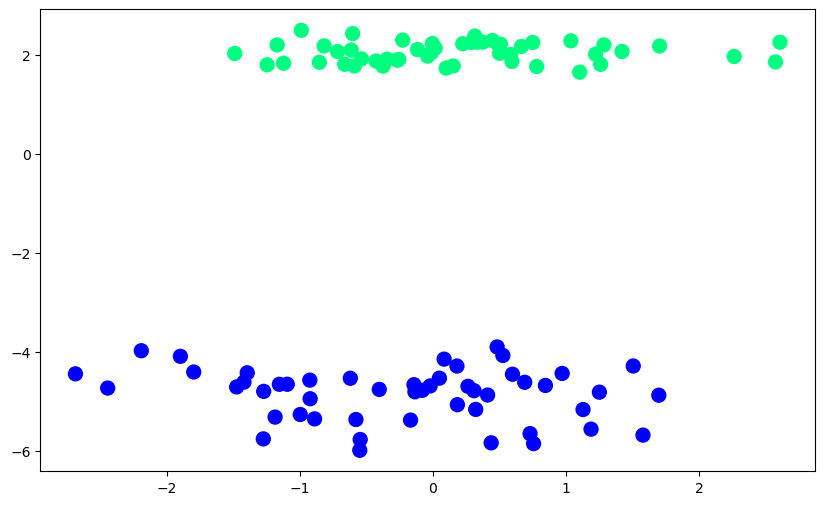

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [66]:
def step(x):
    return 1 if x>0 else 0

In [67]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1) # Add bias term
    weights=np.ones(X.shape[1]) # Initialize weights
    lr=0.01 # Learning rate
    
    for i in range(1000):
        j=np.random.randint(0,100) # Randomly select an example
        y_hat=step(np.dot(X[j],weights)) 
        weights+=lr*(y[j]-y_hat)*X[j]
        
    return weights[0], weights[1:]

In [68]:
intercept, coefficients = perceptron(X,y)
print(f"Intercept: {intercept}, Coefficients: {coefficients}")


Intercept: 1.0, Coefficients: [1. 1.]


In [69]:
m=-coefficients[0]/coefficients[1]
b=-intercept/coefficients[1]

In [70]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b

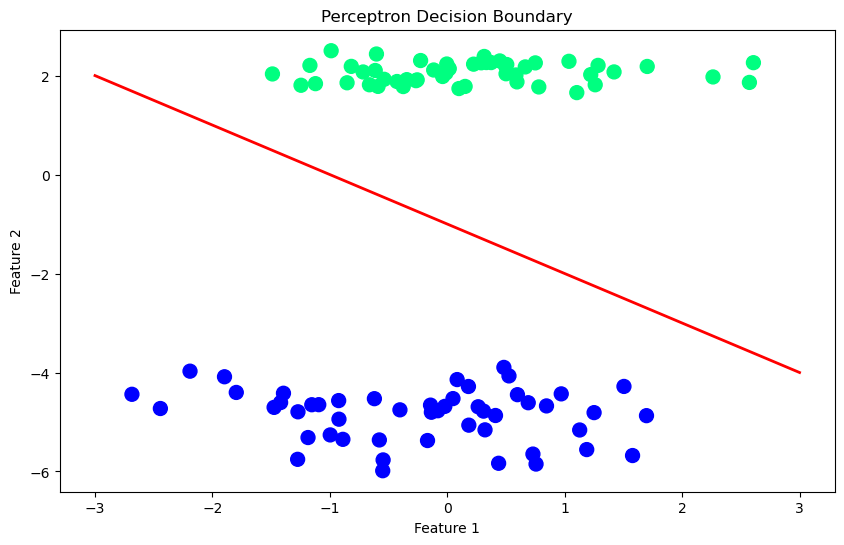

In [71]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.title('Perceptron Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

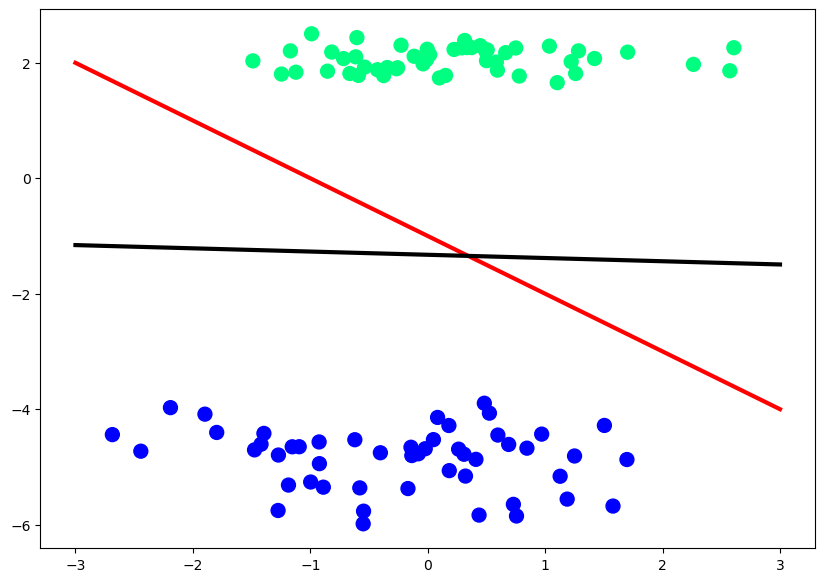

In [72]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(X,y)

m1=-(lor.coef_[0][0]/lor.coef_[0][1])
b1=-(lor.intercept_/lor.coef_[0][1])

x_input1=np.linspace(-3,3,100)
y_input1=m1*x_input+b1

plt.figure(figsize=(10,7))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
# plt.ylim(-3,2)

In [74]:
# there is a difference in the decision boundary because the perceptron uses a step function, while logistic regression uses a sigmoid function. 
